# Image style transfer

In [1]:
import cv2
import numpy as np
import os
import skimage.io
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
from functools import reduce
tf.disable_eager_execution()

import vgg19

## Function definition

In [2]:
CONTENT_LAYER = 'conv4_2'
STYLE_LAYERS= ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']

ALPHA = 1.0
BETA = 50.0
LR = 1.0

def load_image(path):
    """
    Load image and normalize by the of the dataset.
    """
    img = skimage.io.imread(path)
    yuv = cv2.cvtColor(np.float32(img), cv2.COLOR_RGB2YUV)
    img = img - vgg19.VGG_MEAN
    img = img[:,:,(2,1,0)]  # rgb to bgr
    return img[np.newaxis, :, :, :], yuv

def save_image(img, path, content_yuv=None):
    """
    Save image.
    """
    img = np.squeeze(img)
    img = img[:,:,(2,1,0)]  # bgr to rgb
    img = img + vgg19.VGG_MEAN
    if content_yuv is not None:
        yuv = cv2.cvtColor(np.float32(img), cv2.COLOR_RGB2YUV)
        yuv[:,:,1:3] = content_yuv[:,:,1:3]
        img = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)
    img = np.clip(img, 0, 255).astype(np.uint8)
    skimage.io.imsave(path, img)
    
def plot_image(img, content_yuv=None):
    """
    Plot image.
    """
    img = np.squeeze(img)
    img = img[:,:,(2,1,0)]  # bgr to rgb
    img = img + vgg19.VGG_MEAN
    if content_yuv is not None:
        yuv = cv2.cvtColor(np.float32(img), cv2.COLOR_RGB2YUV)
        yuv[:,:,1:3] = content_yuv[:,:,1:3]
        img = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)
    img = np.clip(img, 0, 255).astype(np.uint8)
    plt.imshow(img)

def feature_to_gram(f):
    shape = f.get_shape()
    n_channels = shape[3]
    size = np.prod(shape)
    f = tf.reshape(f, [-1, n_channels])
    return tf.matmul(tf.transpose(f), f) / size

def get_style_rep(vgg):
    return list(map(feature_to_gram, map(lambda l: getattr(vgg, l), STYLE_LAYERS)))

def compute_style_loss(style_rep, image_vgg):
    style_losses = list(map(tf.nn.l2_loss, [a - b for (a, b) in zip(style_rep, get_style_rep(image_vgg))]))
    style_losses = [style_losses[i] / (style_rep[i].size) for i in range(len(style_losses))]
    return reduce(tf.add, style_losses)

## Settings

In [3]:
content_path = 'examples/content.jpg'  # Path to content image
style_path = 'examples/style.jpg'  # Path to style image
iterations = 1000
vgg_path = 'models/vgg19.npy'  # Path to pretrained vgg-19 npy model
preserve_color = True

## Style transfer

Iteration:    1/1000        Content loss:   46564.10        Style loss:  640038.87
Iteration:    2/1000        Content loss:   45281.38        Style loss:  626704.69
Iteration:    3/1000        Content loss:   44297.94        Style loss:  609252.98
Iteration:    4/1000        Content loss:   43552.29        Style loss:  588248.78
Iteration:    5/1000        Content loss:   43001.59        Style loss:  564472.22
Iteration:    6/1000        Content loss:   42614.41        Style loss:  538747.31
Iteration:    7/1000        Content loss:   42377.49        Style loss:  511989.01
Iteration:    8/1000        Content loss:   42284.24        Style loss:  485281.93
Iteration:    9/1000        Content loss:   42325.25        Style loss:  459799.46
Iteration:   10/1000        Content loss:   42482.06        Style loss:  436606.15
Iteration:   11/1000        Content loss:   42716.86        Style loss:  416373.39
Iteration:   12/1000        Content loss:   42971.81        Style loss:  399043.09
Iter

Iteration:  100/1000        Content loss:   40206.95        Style loss:   52858.23
Iteration:  101/1000        Content loss:   40090.47        Style loss:   52371.23
Iteration:  102/1000        Content loss:   39975.79        Style loss:   51894.71
Iteration:  103/1000        Content loss:   39862.57        Style loss:   51427.76
Iteration:  104/1000        Content loss:   39750.14        Style loss:   50971.49
Iteration:  105/1000        Content loss:   39638.31        Style loss:   50525.56
Iteration:  106/1000        Content loss:   39527.13        Style loss:   50089.18
Iteration:  107/1000        Content loss:   39416.24        Style loss:   49662.50
Iteration:  108/1000        Content loss:   39305.68        Style loss:   49244.95
Iteration:  109/1000        Content loss:   39195.86        Style loss:   48836.34
Iteration:  110/1000        Content loss:   39086.68        Style loss:   48436.97
Iteration:  111/1000        Content loss:   38978.78        Style loss:   48045.47
Iter

Iteration:  199/1000        Content loss:   31958.97        Style loss:   28134.09
Iteration:  200/1000        Content loss:   31899.74        Style loss:   27987.06
Iteration:  201/1000        Content loss:   31840.96        Style loss:   27840.86
Iteration:  202/1000        Content loss:   31782.80        Style loss:   27695.33
Iteration:  203/1000        Content loss:   31725.27        Style loss:   27550.37
Iteration:  204/1000        Content loss:   31668.05        Style loss:   27406.36
Iteration:  205/1000        Content loss:   31610.95        Style loss:   27263.53
Iteration:  206/1000        Content loss:   31553.81        Style loss:   27121.92
Iteration:  207/1000        Content loss:   31496.74        Style loss:   26981.60
Iteration:  208/1000        Content loss:   31439.67        Style loss:   26842.51
Iteration:  209/1000        Content loss:   31382.88        Style loss:   26704.39
Iteration:  210/1000        Content loss:   31326.62        Style loss:   26567.00
Iter

Iteration:  298/1000        Content loss:   27410.30        Style loss:   17174.04
Iteration:  299/1000        Content loss:   27375.67        Style loss:   17092.34
Iteration:  300/1000        Content loss:   27341.32        Style loss:   17011.01
Iteration:  301/1000        Content loss:   27307.26        Style loss:   16930.04
Iteration:  302/1000        Content loss:   27273.22        Style loss:   16849.63
Iteration:  303/1000        Content loss:   27239.22        Style loss:   16769.84
Iteration:  304/1000        Content loss:   27205.26        Style loss:   16690.56
Iteration:  305/1000        Content loss:   27171.31        Style loss:   16611.90
Iteration:  306/1000        Content loss:   27137.53        Style loss:   16533.69
Iteration:  307/1000        Content loss:   27104.06        Style loss:   16455.85
Iteration:  308/1000        Content loss:   27070.62        Style loss:   16378.51
Iteration:  309/1000        Content loss:   27037.19        Style loss:   16301.75
Iter

Iteration:  397/1000        Content loss:   24661.83        Style loss:   11090.52
Iteration:  398/1000        Content loss:   24639.75        Style loss:   11045.76
Iteration:  399/1000        Content loss:   24617.84        Style loss:   11001.19
Iteration:  400/1000        Content loss:   24596.08        Style loss:   10956.82
Iteration:  401/1000        Content loss:   24574.39        Style loss:   10912.70
Iteration:  402/1000        Content loss:   24552.85        Style loss:   10868.82
Iteration:  403/1000        Content loss:   24531.30        Style loss:   10825.32
Iteration:  404/1000        Content loss:   24509.57        Style loss:   10782.33
Iteration:  405/1000        Content loss:   24487.67        Style loss:   10739.97
Iteration:  406/1000        Content loss:   24465.75        Style loss:   10698.01
Iteration:  407/1000        Content loss:   24444.01        Style loss:   10656.25
Iteration:  408/1000        Content loss:   24422.52        Style loss:   10614.67
Iter

Iteration:  496/1000        Content loss:   22833.49        Style loss:    7827.39
Iteration:  497/1000        Content loss:   22818.34        Style loss:    7803.57
Iteration:  498/1000        Content loss:   22803.01        Style loss:    7780.16
Iteration:  499/1000        Content loss:   22787.69        Style loss:    7756.99
Iteration:  500/1000        Content loss:   22772.79        Style loss:    7733.60
Iteration:  501/1000        Content loss:   22758.47        Style loss:    7709.81
Iteration:  502/1000        Content loss:   22744.37        Style loss:    7685.99
Iteration:  503/1000        Content loss:   22730.10        Style loss:    7662.58
Iteration:  504/1000        Content loss:   22715.34        Style loss:    7639.85
Iteration:  505/1000        Content loss:   22700.44        Style loss:    7617.46
Iteration:  506/1000        Content loss:   22685.78        Style loss:    7595.00
Iteration:  507/1000        Content loss:   22671.56        Style loss:    7572.29
Iter

Iteration:  595/1000        Content loss:   21582.82        Style loss:    6089.02
Iteration:  596/1000        Content loss:   21572.79        Style loss:    6076.08
Iteration:  597/1000        Content loss:   21562.42        Style loss:    6063.59
Iteration:  598/1000        Content loss:   21551.38        Style loss:    6051.87
Iteration:  599/1000        Content loss:   21540.44        Style loss:    6040.20
Iteration:  600/1000        Content loss:   21530.13        Style loss:    6028.01
Iteration:  601/1000        Content loss:   21520.06        Style loss:    6015.70
Iteration:  602/1000        Content loss:   21509.70        Style loss:    6003.84
Iteration:  603/1000        Content loss:   21499.03        Style loss:    5992.41
Iteration:  604/1000        Content loss:   21488.82        Style loss:    5980.65
Iteration:  605/1000        Content loss:   21479.39        Style loss:    5968.22
Iteration:  606/1000        Content loss:   21470.03        Style loss:    5955.82
Iter

Iteration:  694/1000        Content loss:   20687.67        Style loss:    5187.58
Iteration:  695/1000        Content loss:   20680.26        Style loss:    5180.86
Iteration:  696/1000        Content loss:   20672.88        Style loss:    5174.16
Iteration:  697/1000        Content loss:   20665.54        Style loss:    5167.48
Iteration:  698/1000        Content loss:   20658.22        Style loss:    5160.86
Iteration:  699/1000        Content loss:   20651.08        Style loss:    5154.13
Iteration:  700/1000        Content loss:   20643.65        Style loss:    5147.77
Iteration:  701/1000        Content loss:   20636.01        Style loss:    5141.68
Iteration:  702/1000        Content loss:   20628.41        Style loss:    5135.59
Iteration:  703/1000        Content loss:   20620.84        Style loss:    5129.51
Iteration:  704/1000        Content loss:   20613.22        Style loss:    5123.54
Iteration:  705/1000        Content loss:   20605.78        Style loss:    5117.46
Iter

Iteration:  793/1000        Content loss:   20049.35        Style loss:    4692.46
Iteration:  794/1000        Content loss:   20043.72        Style loss:    4689.00
Iteration:  795/1000        Content loss:   20038.75        Style loss:    4684.91
Iteration:  796/1000        Content loss:   20033.69        Style loss:    4680.95
Iteration:  797/1000        Content loss:   20027.93        Style loss:    4677.72
Iteration:  798/1000        Content loss:   20022.13        Style loss:    4674.55
Iteration:  799/1000        Content loss:   20016.84        Style loss:    4670.91
Iteration:  800/1000        Content loss:   20011.52        Style loss:    4667.33
Iteration:  801/1000        Content loss:   20005.91        Style loss:    4664.07
Iteration:  802/1000        Content loss:   20000.39        Style loss:    4660.75
Iteration:  803/1000        Content loss:   19995.21        Style loss:    4657.12
Iteration:  804/1000        Content loss:   19989.91        Style loss:    4653.66
Iter

Iteration:  892/1000        Content loss:   19600.08        Style loss:    4398.18
Iteration:  893/1000        Content loss:   19595.94        Style loss:    4396.26
Iteration:  894/1000        Content loss:   19592.16        Style loss:    4394.00
Iteration:  895/1000        Content loss:   19588.51        Style loss:    4391.64
Iteration:  896/1000        Content loss:   19584.29        Style loss:    4389.87
Iteration:  897/1000        Content loss:   19580.61        Style loss:    4387.57
Iteration:  898/1000        Content loss:   19576.90        Style loss:    4385.32
Iteration:  899/1000        Content loss:   19573.27        Style loss:    4383.02
Iteration:  900/1000        Content loss:   19569.55        Style loss:    4380.82
Iteration:  901/1000        Content loss:   19566.26        Style loss:    4378.23
Iteration:  902/1000        Content loss:   19563.01        Style loss:    4375.62
Iteration:  903/1000        Content loss:   19559.61        Style loss:    4373.17
Iter

Iteration:  991/1000        Content loss:   19285.22        Style loss:    4216.47
Iteration:  992/1000        Content loss:   19282.36        Style loss:    4215.15
Iteration:  993/1000        Content loss:   19279.30        Style loss:    4214.07
Iteration:  994/1000        Content loss:   19276.51        Style loss:    4212.73
Iteration:  995/1000        Content loss:   19274.07        Style loss:    4211.06
Iteration:  996/1000        Content loss:   19271.93        Style loss:    4209.09
Iteration:  997/1000        Content loss:   19269.41        Style loss:    4207.53
Iteration:  998/1000        Content loss:   19266.88        Style loss:    4205.98
Iteration:  999/1000        Content loss:   19264.22        Style loss:    4204.56
Iteration: 1000/1000        Content loss:   19261.35        Style loss:    4203.36


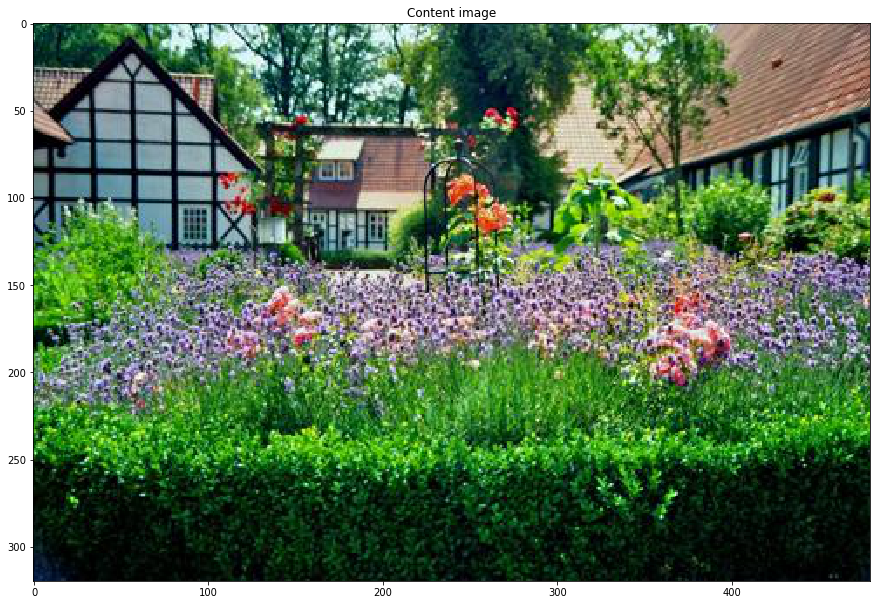

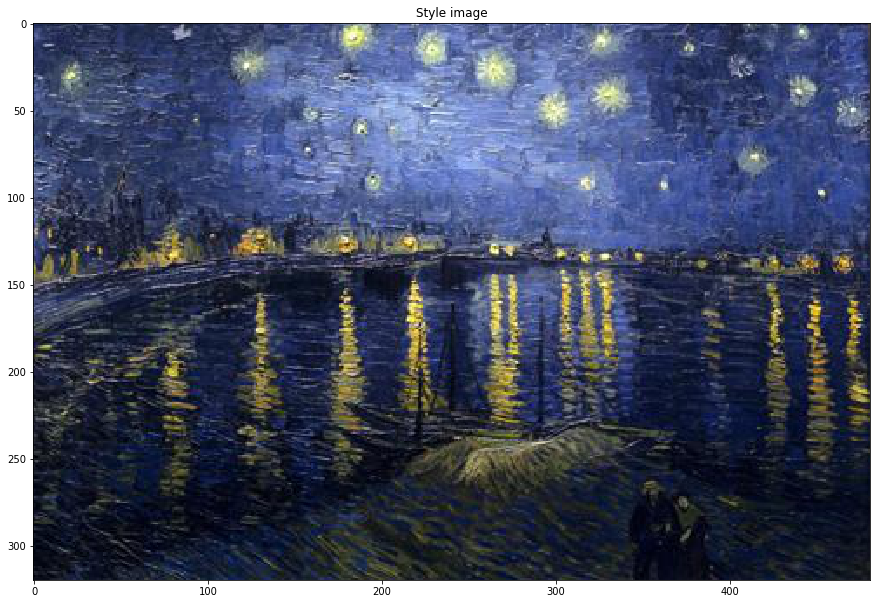

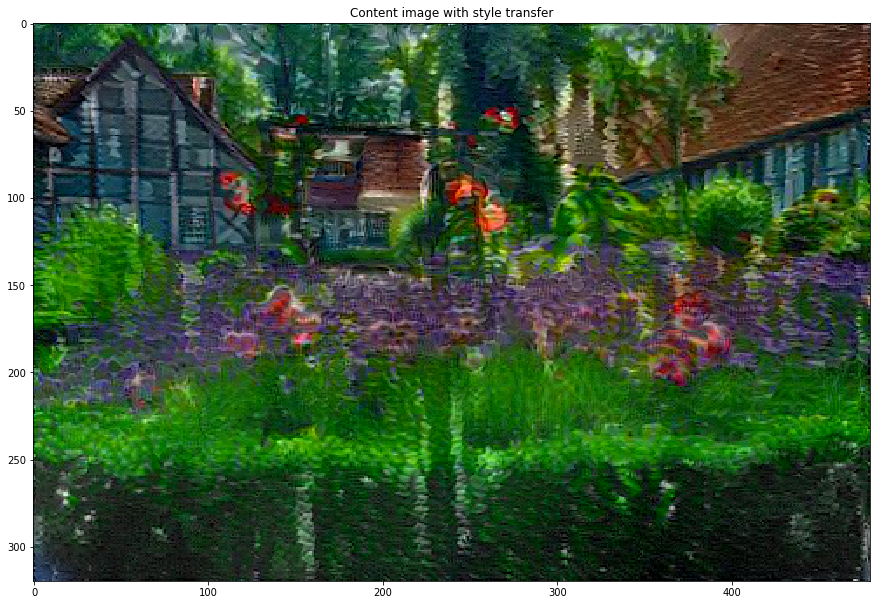

In [4]:
# Open input images and normalize them
content_img, content_yuv = load_image(content_path)
style_img, style_yuv = load_image(style_path)

# Obtain content and style reps
with tf.Session() as sess:
    content_vgg = vgg19.Vgg19(vgg_path)
    content = tf.placeholder("float", content_img.shape)
    content_vgg.build(content)
    style_vgg = vgg19.Vgg19(vgg_path)
    style = tf.placeholder("float", style_img.shape)
    style_vgg.build(style)

    sess.run(tf.global_variables_initializer())
    content_rep = sess.run(getattr(content_vgg, CONTENT_LAYER), feed_dict={content: content_img})
    style_rep = sess.run(get_style_rep(style_vgg), feed_dict={style: style_img})

# Start with white noise
noise = tf.truncated_normal(content_img.shape, stddev=0.1 * np.std(content_img))
image = tf.Variable(noise)
image_vgg = vgg19.Vgg19(vgg_path)
image_vgg.build(image)

# Define losses and optimizer
content_loss = tf.nn.l2_loss(getattr(image_vgg, CONTENT_LAYER) - content_rep) / content_rep.size
style_loss = compute_style_loss(style_rep, image_vgg)
loss = tf.add(ALPHA * content_loss, BETA * style_loss)
optimizer = tf.train.AdamOptimizer(LR).minimize(loss)

# Style transfer
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1, iterations + 1):
        sess.run(optimizer)
        fmt_str = 'Iteration: {:4}/{:4}        Content loss: {:10.2f}        Style loss: {:10.2f}'
        print(fmt_str.format(i, iterations, ALPHA * content_loss.eval(), BETA * style_loss.eval()))
    
    # Undo mean subtract and show output image
    plt.figure(figsize=(15, 15))
    plot_image(content_img, content_yuv if preserve_color else None)
    plt.title('Content image')
    plt.figure(figsize=(15, 15))
    plot_image(style_img, style_yuv if preserve_color else None)
    plt.title('Style image')
    plt.figure(figsize=(15, 15))
    plot_image(image.eval(), content_yuv if preserve_color else None)
    plt.title('Content image with style transfer')